# Титанак

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re
import numpy as np

## Знакомство с данными

In [2]:
df = pd.read_csv('train (2).csv')

In [3]:
# pd.set_option('display.max_rows', None)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Datafraim пассажиров парохода Титаник имеет 891 запись, располагает следующими данными:
1.	Survived — выжил данный пассажир или нет (0 для умерших, 1 для выживших)
2.	Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);
3.	Name — имя;
4.	Sex — пол;
5.	Age — возраст;
6.	SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
7.	Parch — количество родителей, детей (в том числе приемных) на борту титаника;
8.	Ticket — номер билета;
9.	Fare — плата за проезд;
10.	 Cabin — каюта;
11.	Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

Из них пропуски данных есть в столбцах возраст-177, каюта-687 и порт посадки-2


## Предобработка данных

#### Столбец возраст

In [6]:
age_df = df.query("Age != Age")

In [7]:
# Класс пассажиров с незаполенным возрастом
age_df.Pclass.value_counts(normalize=True).mul(100).round(0)

3    77.0
1    17.0
2     6.0
Name: Pclass, dtype: float64

In [8]:
#Путешествовали с братьями и сестрами, с супругами
age_df.SibSp.value_counts(normalize=True).mul(100).round()

0    77.0
1    15.0
8     4.0
3     2.0
2     2.0
Name: SibSp, dtype: float64

In [9]:
#Путешествовали с родителями или детьми
age_df.Parch.value_counts(normalize=True).mul(100).round(2)

0    88.70
2     6.78
1     4.52
Name: Parch, dtype: float64

In [10]:
#Пол пассажиров с пропущенным возрастом
age_df.groupby(age_df.Sex.tolist(),as_index=False).size()

,index,size
0,female,53
1,male,124


In [11]:
# процентное соотношение женщин и мужчин
age_df.Sex.value_counts(normalize=True).mul(100).round(2)

male      70.06
female    29.94
Name: Sex, dtype: float64

In [12]:
# место отправки
age_df.Embarked.value_counts(normalize=True).mul(100).round(2)

S    50.85
Q    27.68
C    21.47
Name: Embarked, dtype: float64

In [13]:
# узнаем соотношение выживших и погибших с пропуском в графе возраст
age_df.groupby(age_df.Survived.tolist(),as_index=False).size()

,index,size
0,0,125
1,1,52


#### Изучив данные по пропускам в графе возраст, могу сделать вывод, что, в основном, это пассажиры третьего класса -- 77% от все пропусков, 17% первый класс, 6% второй класс. Далее я сделала выборку по родственникам на борту и полу и выяснила, что большинство пропусков по мужчинам, путешествовавшим в одиночку. Иных закономерностей не выявлено. Из 177 человек с незаполненным возрастом погибло 125, возраст 52 выживших нам не известен

#### Столбец Каюта

In [14]:
cab_df = df.query("Cabin != Cabin")
cab_df.Pclass.value_counts(normalize=True).mul(100).round()

3    70.0
2    24.0
1     6.0
Name: Pclass, dtype: float64

In [15]:
cab_df.groupby(cab_df.Survived.tolist(),as_index=False).size()

,index,size
0,0,481
1,1,206


In [16]:
# Всего выживших
df.query('Survived == 1').shape[0]

342

#### По пустым ячейкам в графе каюта: 70% незаполненных данных пассажиров третьего класса, 24 второго и 6% первого класса. Всего выжило 342 человека, 206 из них не имеют данных в графе каюта.

####  Столбец порт посадки

In [17]:
df.Embarked.fillna('S', inplace = True)

#### В интеренте в общем доступе имеется информация о порте пассадки [пассажирок](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html) с пропусками, поэтому пропуски в этом столбце заполнены

## Изучим данные пассажиров

In [18]:
#создаем возрастные группы
df.loc[df['Age'].between(0,5), 'age_group'] = '0-5'
df.loc[df['Age'].between(6,10), 'age_group'] = '6-10'
df.loc[df['Age'].between(11,20), 'age_group'] = '11-20'
df.loc[df['Age'].between(21,30), 'age_group'] = '21-30'
df.loc[df['Age'].between(31,40), 'age_group'] = '31-40'
df.loc[df['Age'].between(41,50), 'age_group'] = '41-50'
df.loc[df['Age'].between(51,60), 'age_group'] = '51-60'
df.loc[df['Age'].between(61,70), 'age_group'] = '61-70'
df.loc[df['Age']>71, 'age_group'] = '70+'
df.loc[df['Age'].between(51,60), 'age_group'] = '51-60'
pd.set_option('display.max_rows', None)

In [19]:
# функция выделяет номер билета, делит его пополам, сверяет сумму чисел этих половин
def lucky_tick(tic):
    tic=tic[tic.find(' ')+1:]
    tic = re.sub('[^0-9]', '', tic)
    if re.search('\d+', tic):
        if len(tic)>1:
            tic1 = tic[:len(tic)//2]
            tic2 = tic[len(tic)//2 if len(tic)%2 == 0
                             else (((len(tic)//2))+1):]
            sum = 0
            sum2 = 0
            for i in tic1:sum += int(i)
            for i in tic2:sum2 += int(i)
            try:    
                if sum == sum2:
                    return '1'
                elif sum != sum2:
                    return '0'
            except:
                pass
            else:return '0'
    else:return '0'
df['lucky_ticket']=df['Ticket'].apply(lucky_tick)

In [20]:
# df с выжившими
serv_df= df.query("Survived == 1")
serv_df.shape[0]

342

In [21]:
# df с погибшими
dead_df= df.query("Survived != 1")
dead_df['Survived'] = dead_df['Survived'].map({0: 1})
dead_df.shape[0]

C:\Users\Paul\AppData\Local\Temp\ipykernel_12968\883809297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead_df['Survived'] = dead_df['Survived'].map({0: 1})


549

In [22]:
#Процентное соотношение женщин и мужчин
df.Sex.value_counts(normalize=True).mul(100).round(2)

male      64.76
female    35.24
Name: Sex, dtype: float64

In [23]:
# Соотношение по полу выживших
serv_df.Sex.value_counts(normalize=True).mul(100).round(2)

female    68.13
male      31.87
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

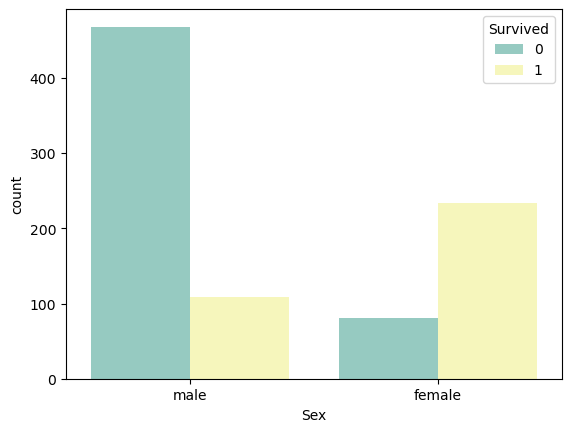

In [24]:
# соотношение женщин и мужчин
sns.countplot(data=df, x="Sex", hue="Survived", palette = 'Set3')

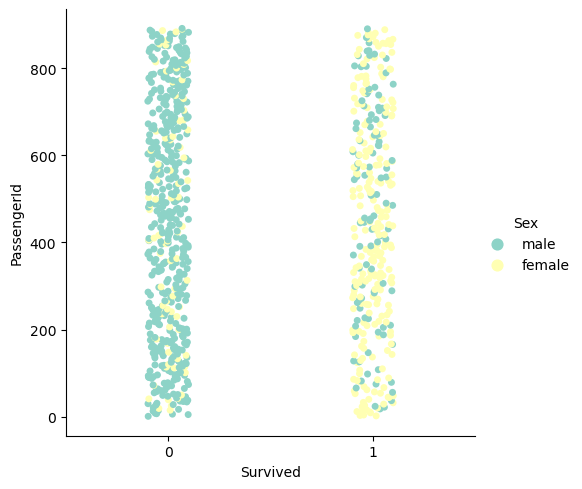

In [25]:
sns.catplot(data=df,
            x='Survived',
            y='PassengerId',
            hue='Sex', palette = 'Set3');

In [26]:
#Процентное соотношение по классам выживших
serv_df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc=sum)

Pclass,1,2,3
Sex,,,
female,91,70,72
male,45,17,47


In [27]:
#Процентное соотношение по классам выживших
dead_df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc=sum)

Pclass,1,2,3
Sex,,,
female,3,6,72
male,77,91,300


In [28]:
#Процентное соотношение по классам выживших
serv_df.Pclass.value_counts(normalize=True).mul(100).round(2)

1    39.77
3    34.80
2    25.44
Name: Pclass, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

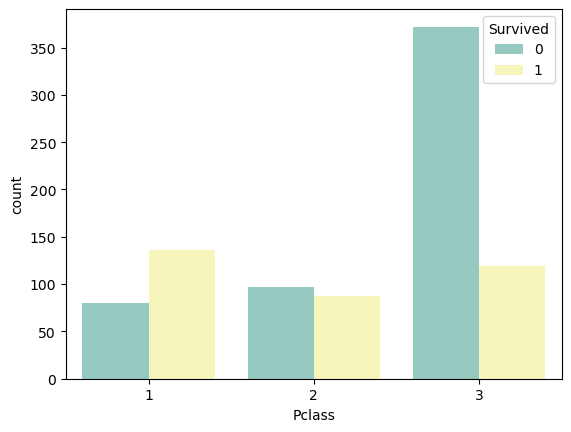

In [29]:
# выжившие/погибшие по классу размещения
sns.countplot(data=df, x="Pclass", hue="Survived", palette = 'Set3')

### Исследуем возраст выживших и умерших

In [30]:
###Исходя из трети имеющихся данных 

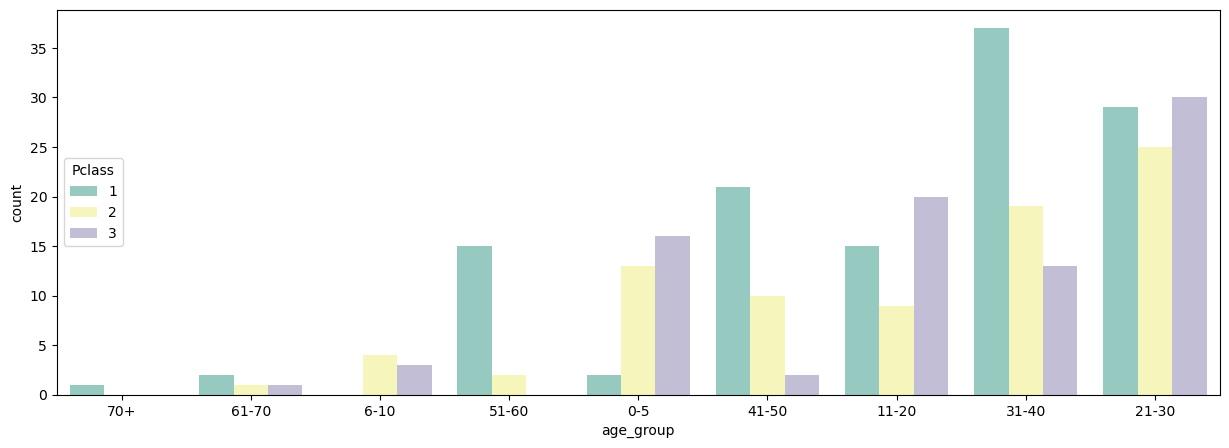

In [31]:
plt.figure(figsize=(15,5))
a = sns.countplot(data=serv_df, x="age_group", hue='Pclass', order=serv_df["age_group"]\
                  .value_counts(ascending=True).index, palette = 'Set3')
sns.move_legend(a, "center left")

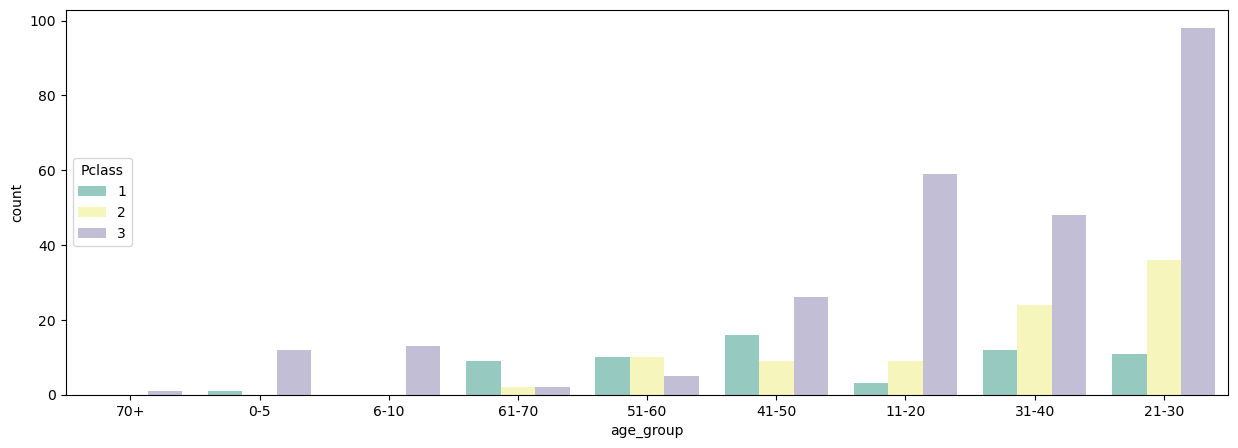

In [32]:
plt.figure(figsize=(15,5))
a = sns.countplot(data=dead_df, x="age_group", hue='Pclass', order=dead_df["age_group"].value_counts(ascending=True).index, palette = 'Set3')
sns.move_legend(a, "center left")

### Мужчин на борту было -- 64,76% , женщин – 35,24%, но спаслось значительно больше представительниц прекрасного пола – 68,13 % против 31,87% мужчина. 
### Рассматривая классы размещения, мы видим, что распределение было следующим: на первый класс приходится 24,24%, на второй – 20,65 и на третий класс 55.11%. Можно сделать вывод, что погибли преимущественно представители третьего класса. Статистика по выжившим говорит нам, что среди них представителей первого класса 39,77%, второго 34,80%, третьего 25,44%. На графике наглядно видно, что почти два из трех представителей первого класса спаслись, во втором вероятность была  2 из 3 в третьем только 1 человек, из трех спасся. Почти все женщины первого и второго класса спаслись.
### Выживаемость на борту корабля напрямую зависило от уровня благосостояния.


### Выдвинем гипотезу, что счастливый билетик –спас его обладателя. Для этого создадим функцию, которая будет делить номер пополам и проверять, равны ли они, если равны-билет счастливый. Сверим процент выживаемости с счастливым билетиком и без него.

In [60]:
# процент счастливых билетов у выживших
df[df.lucky_ticket == '1'].pivot_table(values='PassengerId', index=['Pclass'],
                    columns=['Survived'], aggfunc=len, margins= True , margins_name='Итог')

Survived,0,1,Итог
Pclass,,,
1,3,9,12
2,4,1,5
3,27,11,38
Итог,34,21,55


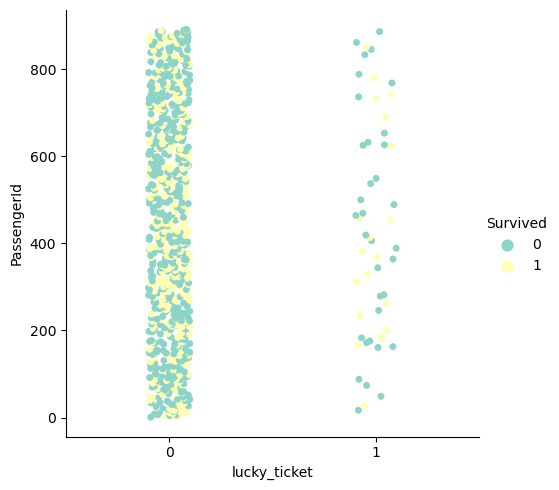

In [36]:
sns.catplot(data=df,
            x='lucky_ticket',
            y='PassengerId',
            hue='Survived', palette = 'Set3');

Из 55 счастливых билетов, действительно счастливыми оказались 21.У представителей первого класса 12 билетов, среди них 9 у выживших. Во втором классе только 1 из пяти. В третьем классе из 38 только 11 у выживших. Можно утверждать, что касательно Титаника нет никакой разницы обычный билет или счастливый, играло роль положение и пол.